In [17]:
# get the Gaussian Distribution function
def f(x,mu,sig) :
    return np.exp(-(x-mu)**2/(2*sig**2)) / (np.sqrt(2*np.pi)*sig)
# partial derivative with respect to mu
def dfdmu (x,mu,sig) :
    return f(x, mu, sig)*(x-mu)/sig**2
# partial derivative with respect to sigma
def dfdsig (x,mu,sig) :
    return f(x, mu, sig) * ((x-mu)**2 / sig**3 - 1/sig)

In [18]:
# evaluate the jacobiab vector (1X2) , each element represent the chi-squared 
# chi-squared = (y-yhat)^2 => yhat is y  result ig the Gasussian Function.
#to be obtained the partial derivatives once with respect to mu and once 
def steepest_step (x, y, mu, sig, aggression) :
    J = np.array([
        -2*(y - f(x,mu,sig)) @ dfdmu(x,mu,sig),
        -2*(y - f(x,mu,sig)) @ dfdsig(x,mu,sig)
    ])
    step = -J * aggression
    return step

In [19]:
#####################3 get the Data #############3
def heights_data () :
    x = np.array([
    50, 52.5, 55, 57.5, # This row is padding
    60, 62.5, 65, 67.5, # This row is padding
    70, 72.5, 75, 77.5, # This row is padding
    80, 82.5, 85, 87.5, # This row is padding
    90, 92.5, 95, 97.5, # This row is padding
    100,102.5,105,107.5, # This row is padding
    110,112.5,115,117.5, # This row is padding
    120,122.5,125,127.5, # This row is padding
    130,132.5, # This row is padding
    135,137.5,140,142.5,145, # This row is padding
    147.5,150,152.5,155,157.5, # Also padding
    160,162.5,165,167.5,170,172.5,175,177.5,180,182.5,
    185,187.5,190,192.5,195,197.5,200,
    202.5,205,207.5, #Also padding
    210,212.5,215,217.5, # This row is padding
    220,222.5,225,227.5, # This row is padding
    230,232.5,235,237.5, # This row is padding
    240,242.5,245,247.5, # This row is padding
    250,252.5,255,257.5, # This row is padding
    260,262.5,265,267.5, # This row is padding
    270,272.5,275,277.5, # This row is padding
    280,282.5,285,287.5, # This row is padding
    290,292.5,295,297.5, # This row is padding
    ])
    width = x[1]-x[0]
    x = x + width / 2

    y = np.array([
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0.031,0.013,0.023,0.064,0.065,0.126,0.132,0.127,0.113,0.091,0.105,0.050,
    0.018,0.018,0.018,0.001,0,
    0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    ])
    y /= np.sum(y) * width
    
    return x, y

<IPython.core.display.Javascript object>


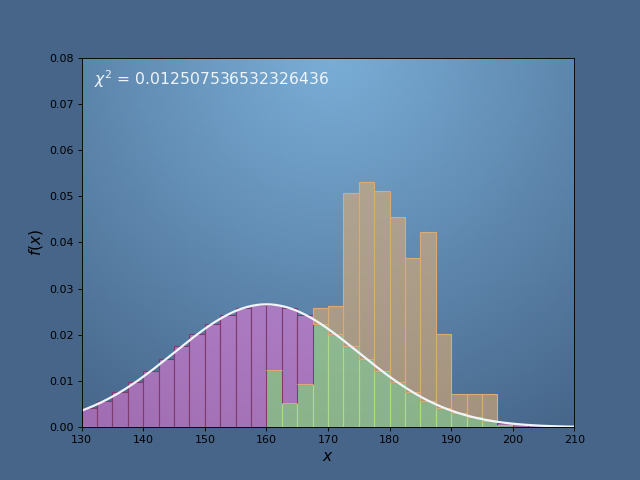

In [6]:
import matplotlib
matplotlib.use("nbAgg")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

magenta = (0xfc/255, 0x75/255, 0xdb/255) # Brighter magenta
orange = (218/255, 171/255, 115/255)
green = (175/255, 219/255, 133/255)
white = (240/255, 245/255, 250/255)
blue1 = (70/255, 101/255, 137/255)
blue2 = (122/255, 174/255, 215/255)

magentaTrans = (0xfc/255, 0x75/255, 0xdb/255, 0.5)
orangeTrans = (218/255, 171/255, 115/255, 0.625)
greenTrans = (175/255, 219/255, 133/255, 0.625)

blueMap = make_colormap([blue2, blue1])
def histogram(f, p):
    μ, σ = p
    binCentre, hist = heights_data()
  
    width = binCentre[1]-binCentre[0]
    bins = binCentre - width / 2

    lineColour = white
    barColour = greenTrans
    barColourUnder = magentaTrans
    barColourOver = orangeTrans
    xmin=130
    xmax=210
    ymax = 0.08
    labelFontSize=13

    fig,ax = plt.subplots(figsize=(8, 6), dpi= 80, facecolor=blue1)

    ax.set_xlim([xmin,xmax])
    ax.set_ylim([0,ymax])
    
    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$f(x)$", fontsize=14)

    xs = np.arange(xmin, xmax, 0.1)
    f = lambda x,μ,σ: np.exp(-(x-μ)**2/(2*σ**2))/np.sqrt(2*np.pi)/σ

    fμ = lambda x: f(x, μ, σ)
    fμxs = fμ(xs)
  
    SSR = np.linalg.norm(f(binCentre,μ,σ)-hist)**2

    xx = np.arange(xmin,xmax,(xmax-xmin)/100)
    yy = np.arange(0,ymax,(ymax)/100)
    X, Y = np.meshgrid(xx, yy)
    Z = ( (X - (xmax+xmin)/2)**2 + ((xmax-xmin)/ymax / 1.333)**2*(Y - ymax)**2 )**0.5 /( (xmin - (xmax+xmin)/2)**2 + ((xmax-xmin)/ymax / 1.333)**2*(0 - ymax)**2 )**0.5
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[xmin, xmax, ymax, 0], cmap=blueMap)
    ax.set_aspect((xmax-xmin)/ymax / 1.333)
    
    histBelow = np.select([hist < fμ(binCentre)], [hist], fμ(binCentre))
    histAbove = np.abs(fμ(binCentre)-hist)
    histAbove1 = np.select([hist < fμ(binCentre)], [histAbove], 0)
    histAbove2 = np.select([hist >= fμ(binCentre)], [histAbove], 0)

    ax.bar(binCentre, histBelow, width=width, color=barColour, edgecolor=green)
    ax.bar(binCentre, histAbove1, width=width, bottom=histBelow,
          color=barColourUnder, edgecolor=np.array(magenta)/2)
    ax.bar(binCentre, histAbove2, width=width, bottom=histBelow,
          color=barColourOver, edgecolor=orange)
    ax.plot(xs, fμxs, color=white, linewidth=2)

    ax.text(132, 0.074, "$\chi^2$ = " + str(SSR), fontsize=14, color=white)
    
    fig.show()
# before fit
# magneta is the Gaussian Distribution
# orange is the data of height
# green is the overlap to
histogram(lambda x,mu,sig : np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig, [160, 15])    


<IPython.core.display.Javascript object>


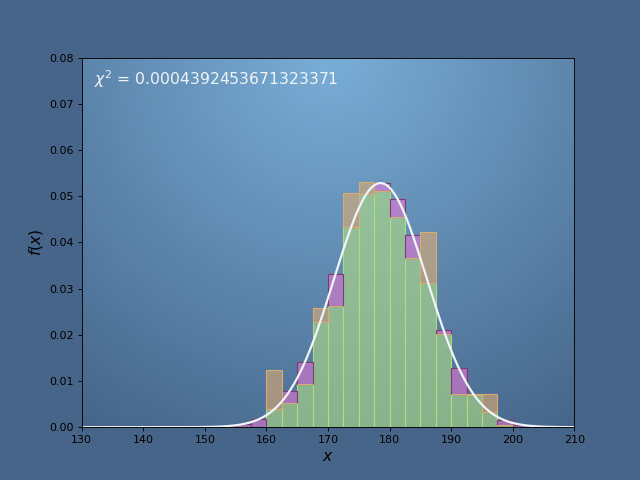

In [20]:
x,y = heights_data()

for i in range(170) :
    dmu, dsig = steepest_step(x, y, mu, sig, 2000)
    mu += dmu
    sig += dsig
histogram(f, [mu, sig])